In [6]:
import numpy as np
from numpy import sin, cos, pi
import pandas as pd

from collections import namedtuple
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns

In [7]:
rand = np.random.default_rng().random

In [8]:
def E(X, Y, charges):
    Ei = np.zeros_like(X)
    Ej = np.zeros_like(Y)
    for c in charges:
        denom = (X-c.x)**2 + (Y-c.y)**2
        denom = np.where(denom==0, np.nan, denom) 
        Ei += c.q * (X-c.x) / denom**(3/2)
        Ej += c.q * (Y-c.y) / denom**(3/2)
    return Ei, Ej

# def E(X, Y, *args):
#     denom = X**2 + Y**2
#     denom = np.where(denom==0, np.nan, denom) 
#     Ei = (3 * X * Y) / denom**(5/2)
#     Ej = (2 * Y**2 - X**2) / denom**(5/2)
#     return Ei, Ej
    

In [9]:
Charge = namedtuple('Charge', ['x', 'y', 'q'])
steps, size = 20, 3
grid = np.linspace(-size, size, steps)
X, Y = np.meshgrid(grid, grid)
figsize = (10,10)

In [14]:
# charges = [
#     Charge(0, -1, 1),
#     Charge(0, 1, -1/3),
#     Charge(1, 0.5, -1/2),]

charges = [
    Charge(2*sin(0/3*pi), 2*cos(0/3*pi), 1),
#     Charge(2*sin(1/3*pi), 2*cos(1/3*pi), -1),
#     Charge(2*sin(2/3*pi), 2*cos(2/3*pi), 1),
    Charge(2*sin(3/3*pi), 2*cos(3/3*pi), -1),
#     Charge(2*sin(4/3*pi), 2*cos(4/3*pi), 1),
#     Charge(2*sin(5/3*pi), 2*cos(5/3*pi), -1),
]

# charges = [Charge(-1+2*rand(), -1+2*rand(), -1+2*rand()) for i in range(5)]
# charges.append(Charge(-1+2*rand(), -1+2*rand(), -sum(c.q for c in charges) * 0.99))

def plot_charges(charges):
    for c in charges:
        plt.plot(c.x, c.y, markersize=np.maximum(5, 15*np.abs(c.q)), marker='o', 
                 color='goldenrod' if c.q > 0 else 'blue')

Ei, Ej = E(X, Y, charges)
magn = (Ei**2 + Ej**2)**(1/2)
magn = np.where(magn==0, np.nan, magn)
Di, Dj = Ei / magn, Ej / magn

df = pd.DataFrame.from_records(charges, columns=Charge._fields)
display(df)
print('Total charge: {:.3f}'.format(df.q.sum()))

,x,y,q
0,0.000000e+00,2.0,1
1,2.449294e-16,-2.0,-1


Total charge: 0.000


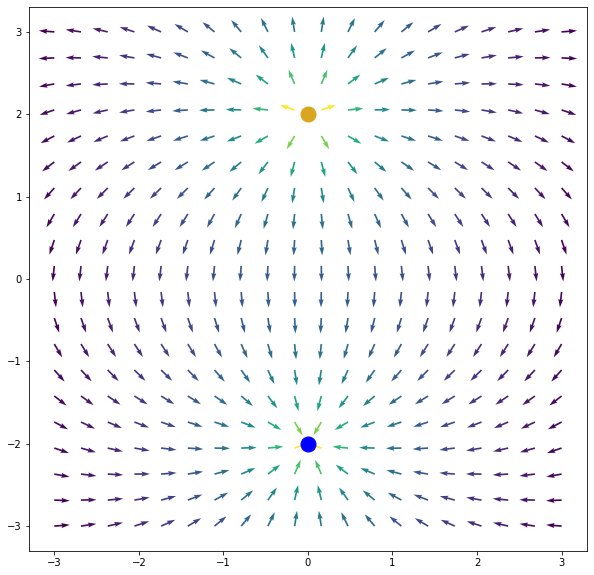

In [15]:
log_magn = np.log(magn)

norm = mpl.colors.Normalize(vmin=np.nanmin(log_magn), vmax=np.nanmax(log_magn))
cm = mpl.cm.viridis
# sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)

fig, ax = plt.subplots(figsize=figsize)
q = ax.quiver(X, Y, Di, Dj, color=cm(norm(log_magn)).reshape(steps**2, -1))
plot_charges(charges)

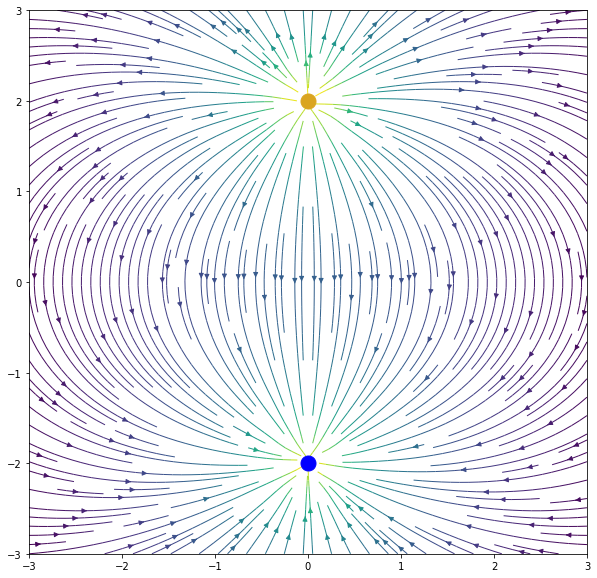

In [16]:
log_magn = np.log(magn)

norm = mpl.colors.Normalize(vmin=np.nanmin(log_magn), vmax=np.nanmax(log_magn))
cm = mpl.cm.viridis
sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)

fig, ax = plt.subplots(figsize=figsize)
q = ax.streamplot(X, Y, Di, Dj, 
                  density=2, linewidth=1, minlength=0.05,
                  cmap=cm, norm=norm, color=log_magn)
plot_charges(charges)